1、导入实验所需的**库**<br>
2、准备**实验数据**<br>
3、**可视化数据**（非必须）<br>
4、搭建**模型**<br>
5、模型**配置**<br>
*   损失函数
*   优化器
*   评价指标

6、模型**训练**<br>
7、模型**评估**




# **导入实验所需的库**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

plt.ion()

# **准备实验数据**

In [ ]:
# 从2-10之间产生20个等差数列，形状改成[n,1]
x = np.linspace(2,10,20).reshape(-1,1)  # 特征

# y = ax + b, a = 2, b = 3
y = 2 * x + 3 # 目标

# 给目标值添加噪声，避免全部数据都在一条直线上
y += np.random.randn(20,1) * 0.5

# **可视化数据**

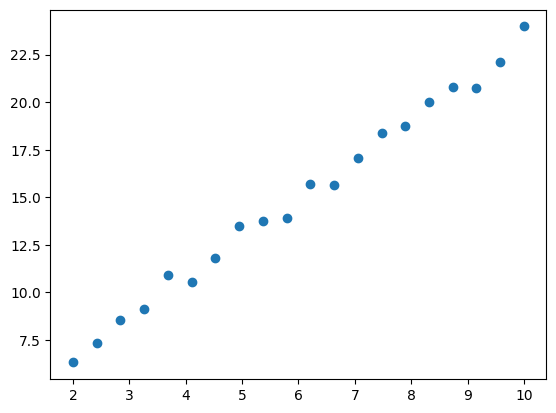

In [ ]:
plt.scatter(x,y)

# **搭建模型**

In [ ]:
class LinearModel(torch.nn.Module):   # 表明从Module类继承
  def __init__(self):
    super().__init__()  # 调用父类的初始化方法

    # torch.nn.Linear：y = ax + b
    # in_features: 表示输入的特征维度
    # out_features: 表示输出的维度，对于回归问题就是1
    self.linear = torch.nn.Linear(in_features=1,out_features=1)

  def forward(self,x):
    y_pred = self.linear(x)
    return y_pred

In [ ]:
from torchsummary import summary
model = LinearModel()
model.to('cuda')
summary(model,(1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# **模型配置**

In [ ]:
# 均方误差
loss_ = torch.nn.MSELoss(reduce='mean')

# 梯度下降算法（优化器）
optimizer = torch.optim.SGD(model.parameters(),lr=0.005)

In [ ]:
# 将x,y转换成Tensor
x = torch.Tensor(x)
y = torch.Tensor(y)

Epoch: 1, w: 0.098597, b: 0.437426
EpochL1,loss:217.15478515625


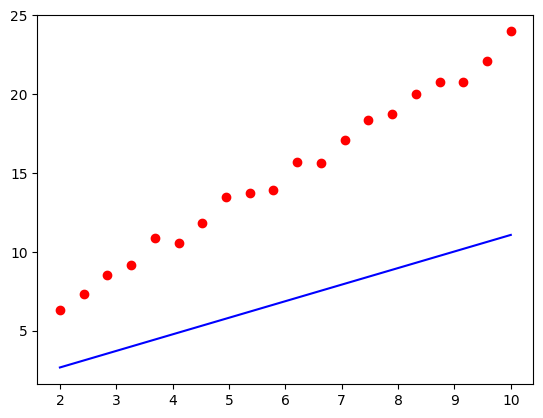

Epoch: 2, w: 1.050765, b: 0.576603
EpochL2,loss:71.54832458496094


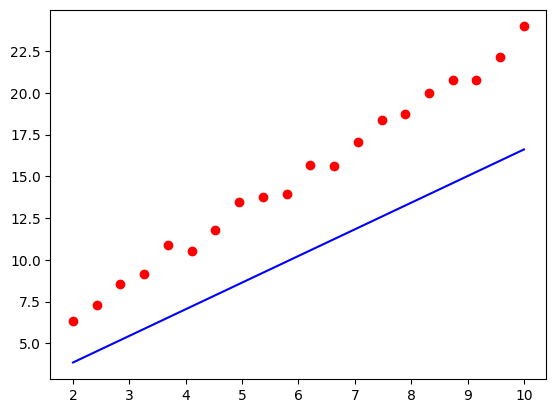

Epoch: 3, w: 1.595674, b: 0.657259
EpochL3,loss:23.83562469482422


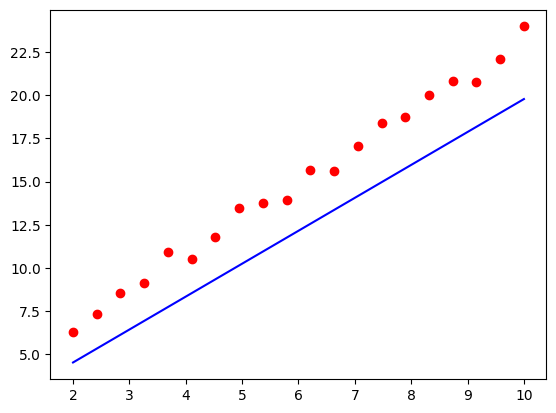

Epoch: 4, w: 1.907456, b: 0.704414
EpochL4,loss:8.200514793395996


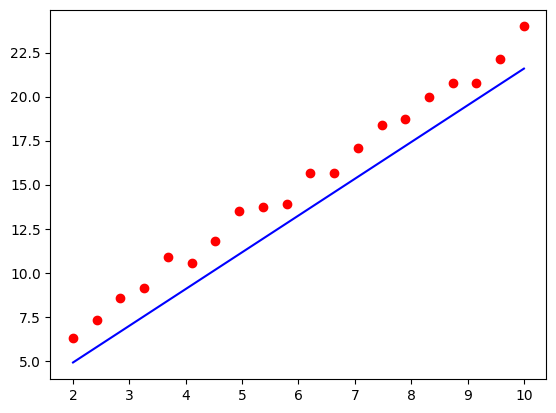

Epoch: 5, w: 2.085788, b: 0.732390
EpochL5,loss:3.0765113830566406


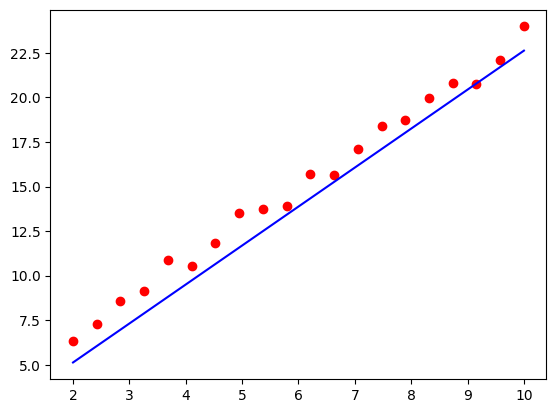

Epoch: 6, w: 2.187730, b: 0.749387
EpochL6,loss:1.3967647552490234


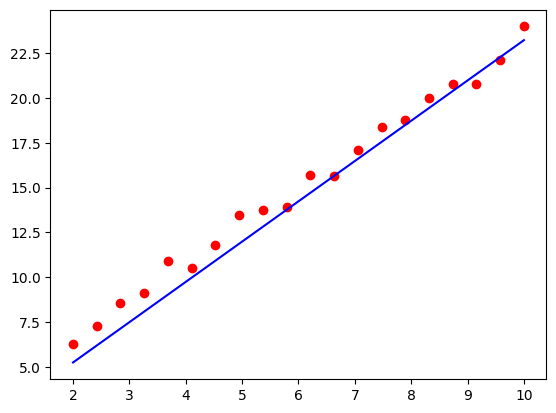

Epoch: 7, w: 2.245943, b: 0.760097
EpochL7,loss:0.8456265330314636


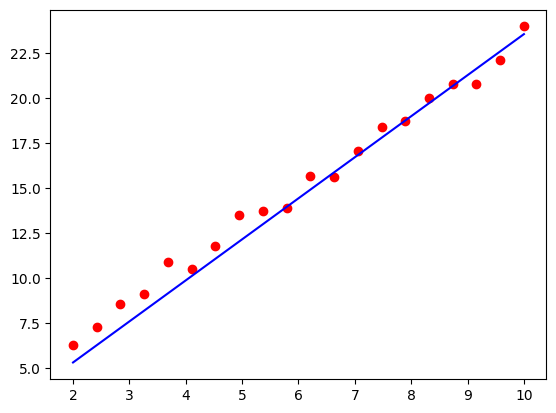

Epoch: 8, w: 2.279126, b: 0.767208
EpochL8,loss:0.6643092036247253


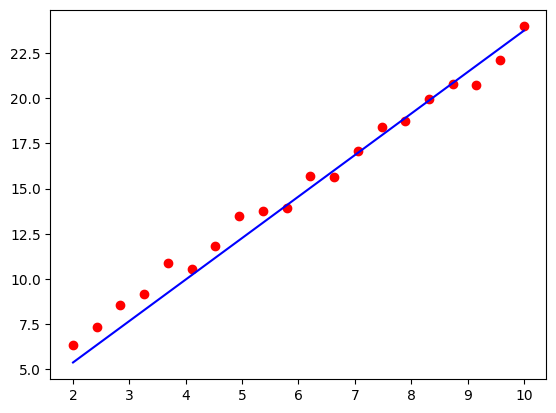

Epoch: 9, w: 2.297980, b: 0.772256
EpochL9,loss:0.6041756272315979


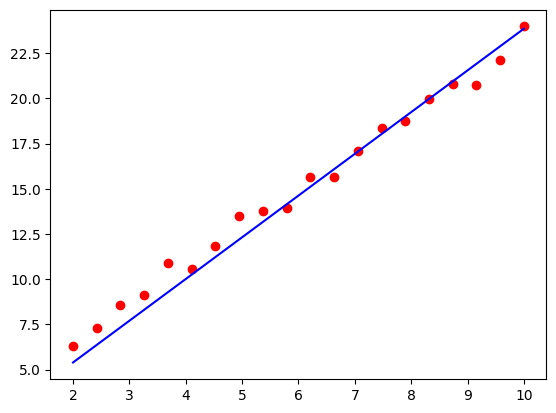

Epoch: 10, w: 2.308633, b: 0.776122
EpochL10,loss:0.5837545394897461


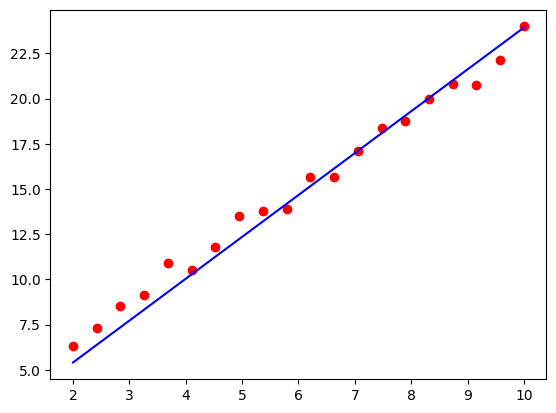

Epoch: 11, w: 2.314590, b: 0.779311
EpochL11,loss:0.5763473510742188


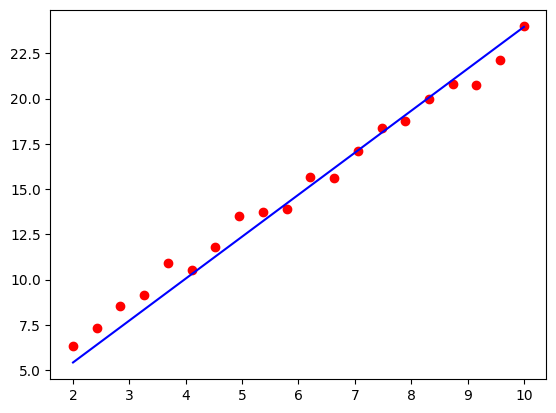

Epoch: 12, w: 2.317861, b: 0.782110
EpochL12,loss:0.5732068419456482


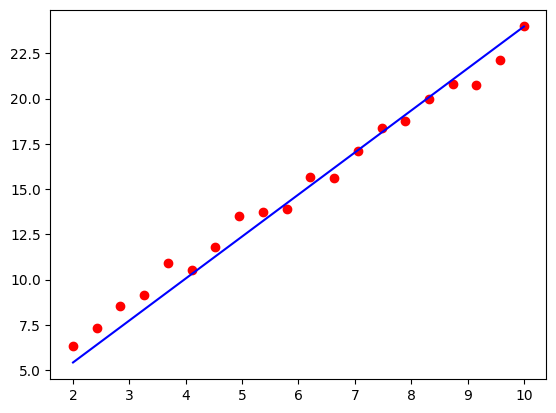

Epoch: 13, w: 2.319593, b: 0.784685
EpochL13,loss:0.5714662075042725


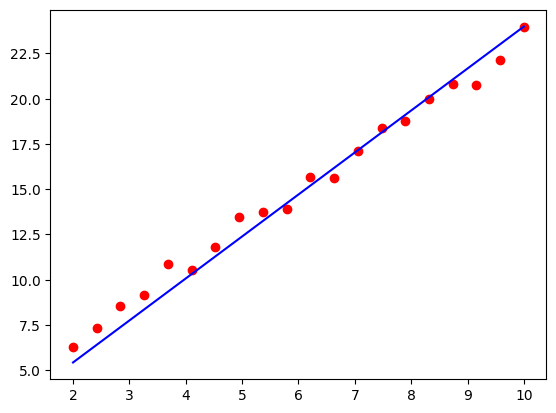

Epoch: 14, w: 2.320445, b: 0.787131
EpochL14,loss:0.5701865553855896


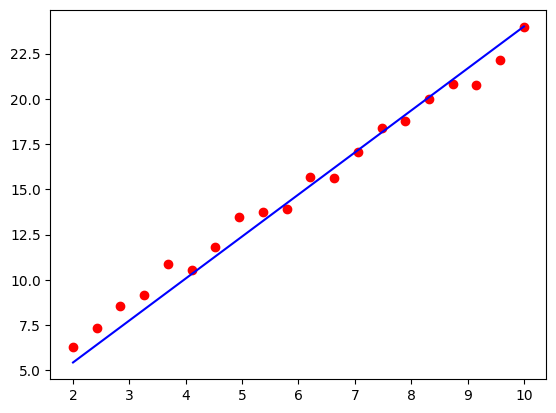

Epoch: 15, w: 2.320793, b: 0.789500
EpochL15,loss:0.5690597891807556


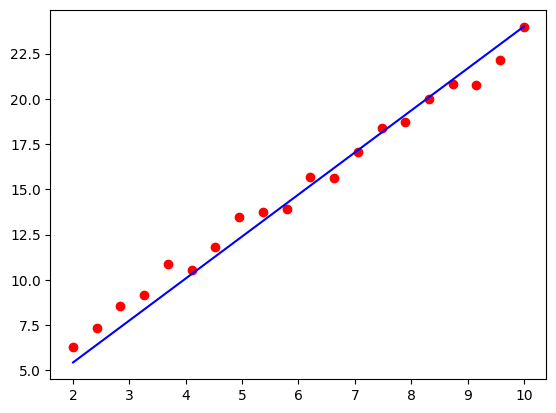

Epoch: 16, w: 2.320854, b: 0.791826
EpochL16,loss:0.567984938621521


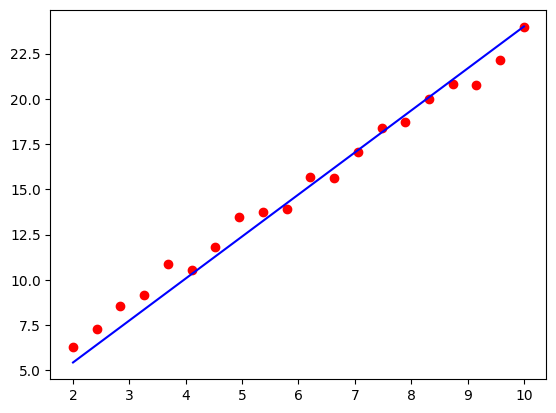

Epoch: 17, w: 2.320749, b: 0.794124
EpochL17,loss:0.5669291615486145


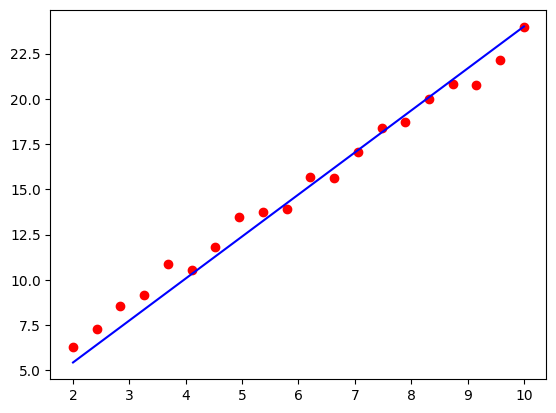

Epoch: 18, w: 2.320550, b: 0.796406
EpochL18,loss:0.5658814311027527


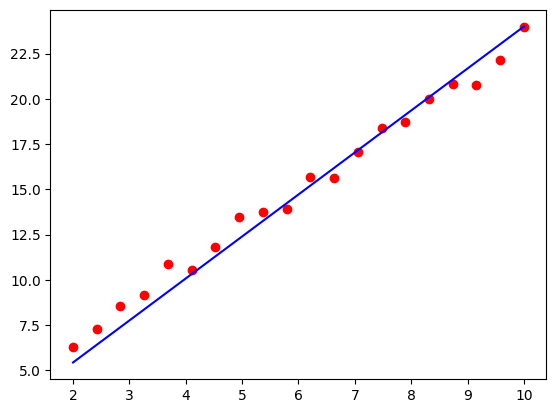

Epoch: 19, w: 2.320298, b: 0.798676
EpochL19,loss:0.5648383498191833


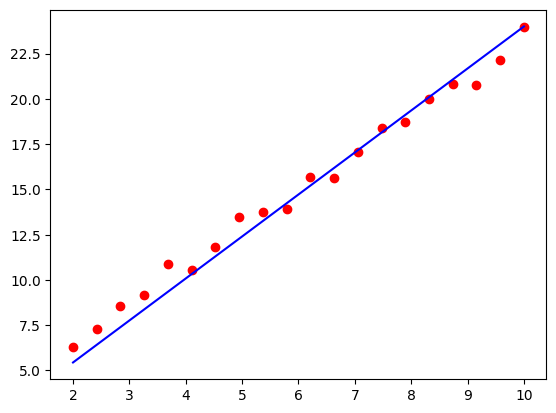

Epoch: 20, w: 2.320015, b: 0.800940
EpochL20,loss:0.563798725605011


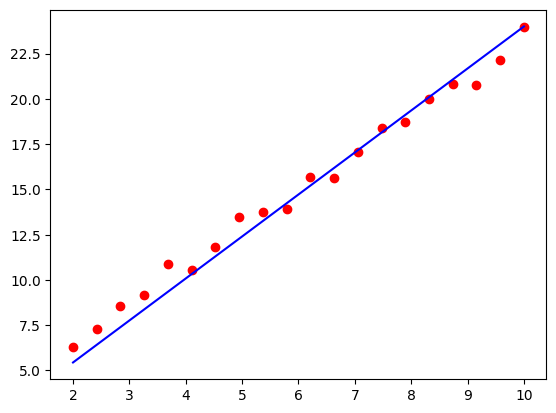

Epoch: 21, w: 2.319715, b: 0.803197
EpochL21,loss:0.5627619624137878


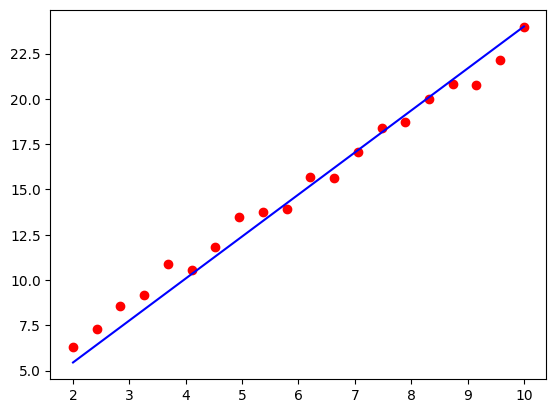

Epoch: 22, w: 2.319405, b: 0.805450
EpochL22,loss:0.5617284178733826


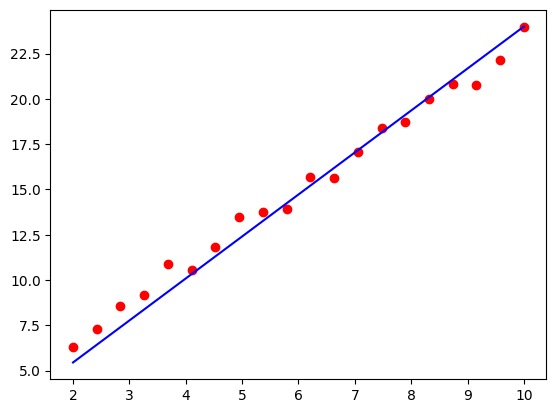

Epoch: 23, w: 2.319090, b: 0.807699
EpochL23,loss:0.5606977343559265


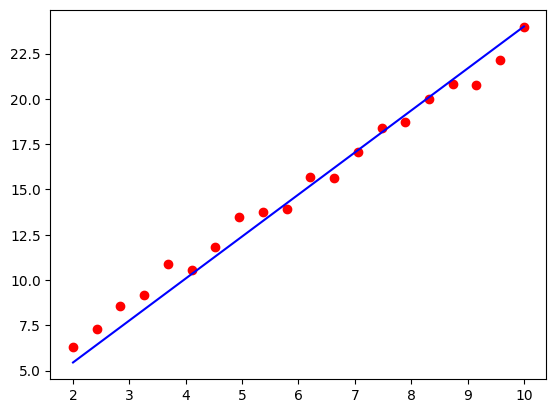

Epoch: 24, w: 2.318772, b: 0.809945
EpochL24,loss:0.5596697926521301


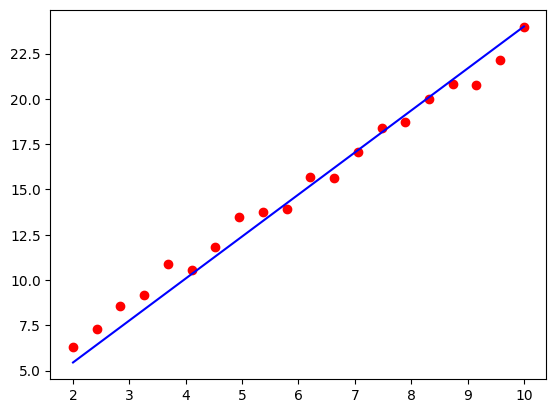

Epoch: 25, w: 2.318453, b: 0.812187
EpochL25,loss:0.558644711971283


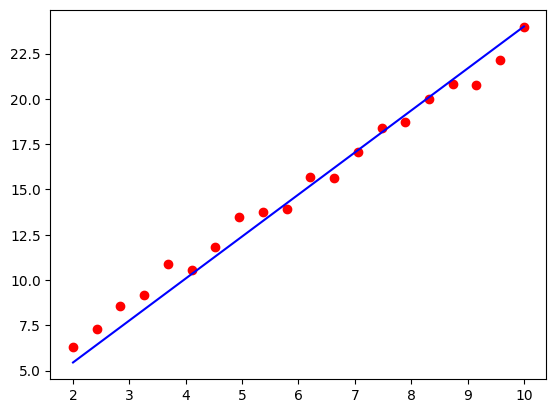

Epoch: 26, w: 2.318132, b: 0.814425
EpochL26,loss:0.5576226115226746


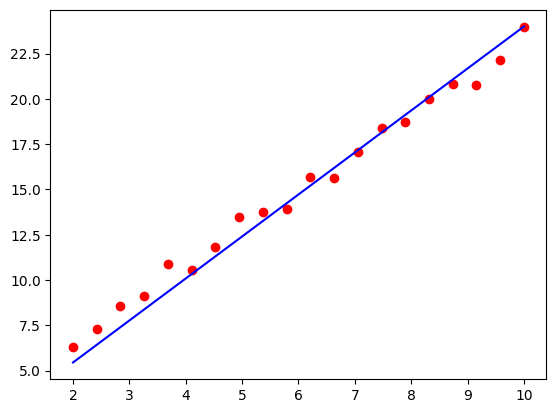

Epoch: 27, w: 2.317812, b: 0.816661
EpochL27,loss:0.5566032528877258


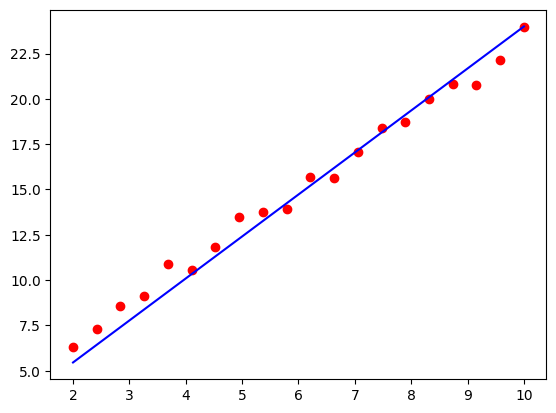

Epoch: 28, w: 2.317492, b: 0.818893
EpochL28,loss:0.555586576461792


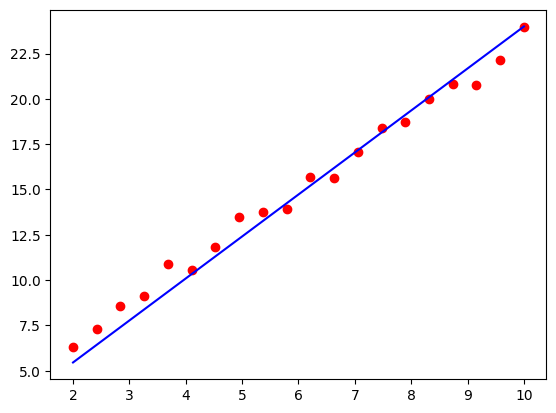

Epoch: 29, w: 2.317172, b: 0.821123
EpochL29,loss:0.5545727014541626


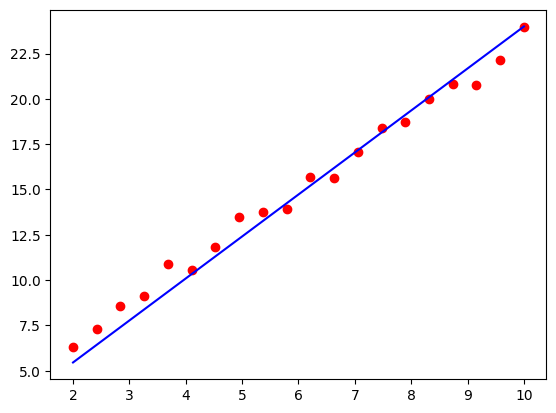

Epoch: 30, w: 2.316852, b: 0.823349
EpochL30,loss:0.5535616874694824


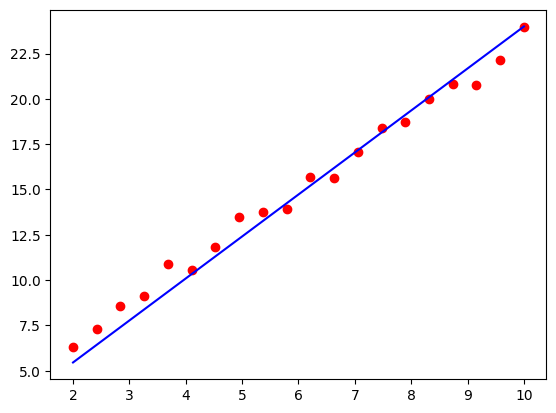

In [ ]:
# 训练
for epoch in range(30):
  # 输出对应的w和b
  print(f'Epoch: {epoch+1}, w: {model.linear.weight.item():4f}, b: {model.linear.bias.item():4f}')

  x = x.to('cuda')
  y = y.to('cuda')

  # 前向传播
  y_pred = model(x)

  #统计预测值与真实值的误差
  loss = loss_(y_pred,y)
  print(f'EpochL{epoch+1},loss:{loss}')

  # 梯度清零
  optimizer.zero_grad()

  # 反向传播
  loss.backward()

  # 更新参数
  optimizer.step()

  # 为了方便绘图，将x和y恢复到初始状态
  x = x.to('cpu')
  y = y.to('cpu')

  plt.scatter(x,y,c='red')

  plt.plot(x,model.linear.weight.item()*x+model.linear.bias.item(),c='blue')
  plt.pause(1)